<a href="https://colab.research.google.com/github/malhartrivedi/EEG_Based_Emotion_Recognition/blob/main/EEG_Based_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
from google.colab import drive
import numpy as np
import tensorflow as tf
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Loading and Feature Extraction
directory = "/content/drive/MyDrive/EEG/Dataset/seed_iv/eeg_feature_smooth/1"
directories = ["/content/drive/MyDrive/EEG/Dataset/seed_iv/eeg_feature_smooth/{}/".format(i + 1) for i in range(3)]

In [ ]:
 # Load the .mat file
# Change the file path to the specific .mat file wanted to load
#data = loadmat('/content/drive/MyDrive/EEG/Dataset/seed_iv/eeg_feature_smooth/1/11_20150916.mat')
data = loadmat('/content/drive/MyDrive/EEG/Dataset/seed_iv/eeg_feature_smooth/1/10_20151014.mat')

# Print the variable names and their types in the loaded .mat file
for variable_name in data:
    print(f"{variable_name}: {type(data[variable_name])}")

__header__: <class 'bytes'>
__version__: <class 'str'>
__globals__: <class 'list'>
de_movingAve1: <class 'numpy.ndarray'>
de_LDS1: <class 'numpy.ndarray'>
psd_movingAve1: <class 'numpy.ndarray'>
psd_LDS1: <class 'numpy.ndarray'>
de_movingAve2: <class 'numpy.ndarray'>
de_LDS2: <class 'numpy.ndarray'>
psd_movingAve2: <class 'numpy.ndarray'>
psd_LDS2: <class 'numpy.ndarray'>
de_movingAve3: <class 'numpy.ndarray'>
de_LDS3: <class 'numpy.ndarray'>
psd_movingAve3: <class 'numpy.ndarray'>
psd_LDS3: <class 'numpy.ndarray'>
de_movingAve4: <class 'numpy.ndarray'>
de_LDS4: <class 'numpy.ndarray'>
psd_movingAve4: <class 'numpy.ndarray'>
psd_LDS4: <class 'numpy.ndarray'>
de_movingAve5: <class 'numpy.ndarray'>
de_LDS5: <class 'numpy.ndarray'>
psd_movingAve5: <class 'numpy.ndarray'>
psd_LDS5: <class 'numpy.ndarray'>
de_movingAve6: <class 'numpy.ndarray'>
de_LDS6: <class 'numpy.ndarray'>
psd_movingAve6: <class 'numpy.ndarray'>
psd_LDS6: <class 'numpy.ndarray'>
de_movingAve7: <class 'numpy.ndarray'>
de

In [ ]:
# Define channel coordinates and a list of channel names
channel_coords = [['0', '0', 'AF3', 'FP1', 'FPZ', 'FP2', 'AF4', '0', '0'], ['F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8'], ['FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8'], ['T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8'], ['TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8'], ['P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8'], ['0', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', '0'], ['0', '0', 'CB1', 'O1', 'OZ', 'O2', 'CB2', '0', '0']]
channel_list = ['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2']
# Calculate the dimensions
print(len(channel_coords), len(channel_coords[0]))
# Creating a dictionary to map channel names to their coordinates
coord_dict = {}
for n in range(len(channel_list)):
    for i, l in enumerate(channel_coords):
        for j, x in enumerate(l):
            if (channel_list[n] == x):
                coord_dict[n] = (i,j)
print(coord_dict)

8 9
{0: (0, 3), 1: (0, 4), 2: (0, 5), 3: (0, 2), 4: (0, 6), 5: (1, 0), 6: (1, 1), 7: (1, 2), 8: (1, 3), 9: (1, 4), 10: (1, 5), 11: (1, 6), 12: (1, 7), 13: (1, 8), 14: (2, 0), 15: (2, 1), 16: (2, 2), 17: (2, 3), 18: (2, 4), 19: (2, 5), 20: (2, 6), 21: (2, 7), 22: (2, 8), 23: (3, 0), 24: (3, 1), 25: (3, 2), 26: (3, 3), 27: (3, 4), 28: (3, 5), 29: (3, 6), 30: (3, 7), 31: (3, 8), 32: (4, 0), 33: (4, 1), 34: (4, 2), 35: (4, 3), 36: (4, 4), 37: (4, 5), 38: (4, 6), 39: (4, 7), 40: (4, 8), 41: (5, 0), 42: (5, 1), 43: (5, 2), 44: (5, 3), 45: (5, 4), 46: (5, 5), 47: (5, 6), 48: (5, 7), 49: (5, 8), 50: (6, 1), 51: (6, 2), 52: (6, 3), 53: (6, 4), 54: (6, 5), 55: (6, 6), 56: (6, 7), 57: (7, 2), 58: (7, 3), 59: (7, 4), 60: (7, 5), 61: (7, 6)}


In [ ]:
# Define the number of samples and feature types
n = 24
perSample = ['de_movingAve', 'de_LDS', 'psd_movingAve', 'psd_LDS']

# Creating an array to store the data
array = np.zeros(shape=(len(directories), len(os.listdir(directories[0])), n, 4, 8, 9, 5, 64))

# Load data and populate the array
for h, dire in enumerate(directories):
    data = [loadmat(dire + file) for file in os.listdir(dire)]
    for i, bigsample in enumerate(data):
        for j in range(n):
            for k, key in enumerate(perSample):
                sample = np.transpose(np.array(bigsample[key + str(j + 1)]), (0, 2, 1))
                sample = np.pad(sample, [(0, 0), (0, 0), (0, 64 - sample.shape[2])])
                for l, channel in enumerate(sample):
                    array[h][i][j][k][coord_dict[l][0]][coord_dict[l][1]] = channel

In [ ]:
# Reshape the data
_X = array.reshape(np.prod(array.shape[0:3]), *array.shape[3:])
X_loso = array[:, :, :, 1, :, :, :]
X_loso = np.transpose(X_loso, (0, 1, 2, 6, 3, 4, 5))

 **Data Slice Visualization:**
The segment enables the visualization of specific data slices by selecting a session, sample, and label index. It plots the flattened data, providing clear x and y-axis labels, allowing us to examine the data's value distribution within the chosen slice.

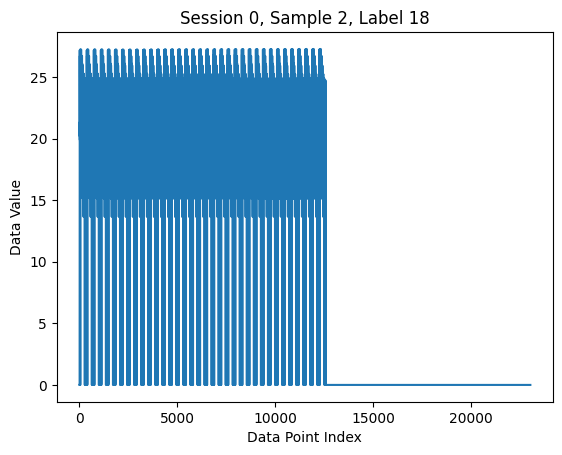

In [ ]:
# Data Visualization
# Plot flattened data for a specific slice
session_index = 0  # Can choose the session to visualize (0, 1, or 2)
sample_index = 2   # Can choose the sample to visualize (0 to 14)
label_index = 18    # Can choose the label to visualize (0 to 23)

flattened_data = X_loso[session_index, sample_index, label_index].flatten()
plt.figure()
plt.plot(flattened_data)
plt.title(f'Session {session_index}, Sample {sample_index}, Label {label_index}')
plt.xlabel('Data Point Index')
plt.ylabel('Data Value')
plt.show()

**Data Reshaping Visualization:**
It segments visualizes the transformation of data by comparing the state before and after reshaping. It allows us to select specific data slices (session, sample, label, and feature type) and provides a side-by-side comparison with x and y-axis labels.

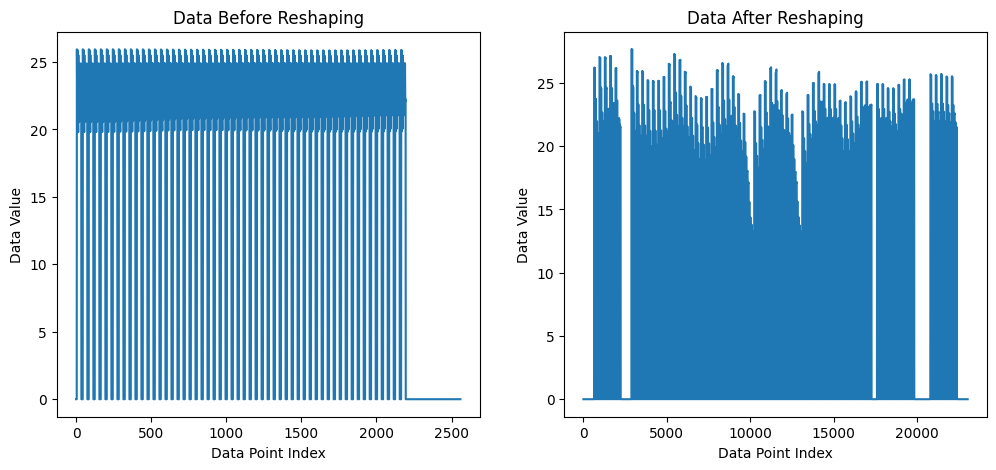

In [ ]:
# Select a specific slice of data for visualization
session_index = 1  # Can choose the session to visualize (0, 1, or 2)
sample_index = 12   # Can choose the sample to visualize (0 to 14)
label_index = 0    # Can choose the label to visualize (0 to 23)

# Select a specific feature type index
feature_type_index = 1

# Data before reshaping
data_before_reshaping = X_loso[session_index, sample_index, label_index, :, :, feature_type_index].flatten()

# Data after reshaping
data_after_reshaping = _X[session_index * 15 * 24 + sample_index * 24 + label_index, feature_type_index, :, :, :].flatten()

# Plot the data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(data_before_reshaping)
plt.title('Data Before Reshaping')
plt.xlabel('Data Point Index')
plt.ylabel('Data Value')

plt.subplot(1, 2, 2)
plt.plot(data_after_reshaping)
plt.title('Data After Reshaping')
plt.xlabel('Data Point Index')
plt.ylabel('Data Value')
plt.show()


**Histogram for Data Distribution:**
Visualize the distribution of values for a specific feature or variable. For example, can plot a histogram for a particular channel's data to see how values are distributed.

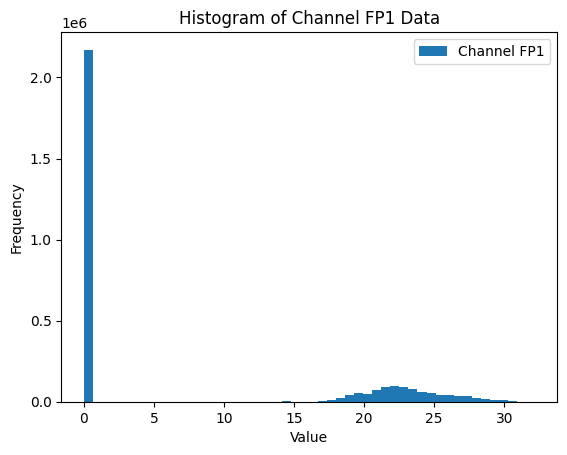

In [ ]:
#Histogram for a specific channel's data
channel_idx = 0  # Can choose the channel index to visualize
data_to_plot = X_loso[:, :, :, :, channel_idx].flatten()  # Flatten the data for the selected channel
plt.hist(data_to_plot, bins=50, label=f'Channel {channel_list[channel_idx]}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.title(f'Histogram of Channel {channel_list[channel_idx]} Data')
plt.show()

In [ ]:
session1_label = [1,2,3,0,2,0,0,1,0,1,2,1,1,1,2,3,2,2,3,3,0,3,0,3]
session2_label = [2,1,3,0,0,2,0,2,3,3,2,3,2,0,1,1,2,1,0,3,0,1,3,1]
session3_label = [1,2,2,1,3,3,3,1,1,2,1,0,2,3,3,0,2,3,0,0,2,0,1,0]
labels = {0: 'neutral', 1: 'sad', 2: 'fear', 3: 'happy'}

y = np.array(session1_label * 15 + session2_label * 15 + session3_label * 15)

print(y.shape)
y_loso = np.reshape(y, (3,15,24))
print(y_loso.shape)

(1080,)
(3, 15, 24)


In [ ]:
def crossval(generate_model, n_epochs, X_train, y_train, X_test, y_test, filename = None):
    kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
    bestmodel = None
    bestAcc = 0
    cvscores = []
    fold = 1
    for train, test in kfold.split(X_train, y_train):
        model = generate_model()
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold} ...')
        model.fit(X_train[train], y_train[train],epochs=n_epochs, verbose=1) # validation_split=0.2)
        scores = model.evaluate(X_train[test], y_train[test], verbose=1)
        print("Score for fold %d - %s: %.2f%%" % (fold, model.metrics_names[1], scores[1]*100))
        if(scores[1] > bestAcc):
            bestAcc = scores[1]
            bestmodel = model
        cvscores.append(scores[1] * 100)
        fold += 1
    print('------------------------------------------------------------------------')
    print("Avg accuracies: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    test_loss, test_acc = bestmodel.evaluate(X_test,  y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

In [ ]:
X = _X.transpose(0,5,1,2,3,4)
print(X.shape)
X = X.reshape(X.shape[0], X.shape[1], np.prod(X.shape[2:]))
print(X.shape)
# Calculate the index to split at
split_index = 16

# Split the data into training and test sets
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

(1080, 64, 4, 8, 9, 5)
(1080, 64, 1440)


In [ ]:
def single_con():
    model = tf.keras.Sequential()

    # Add first convolutional layer
    model.add(tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=X.shape[1:]))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, data_format="channels_last"))

    # Add second convolutional layer
    model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2, strides=2, data_format="channels_last"))

    # Flatten the output before fully connected layers
    model.add(tf.keras.layers.Flatten())

    # Fully connected layers
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    # Dropout layer
    model.add(tf.keras.layers.Dropout(0.7))

    # Output layer
    model.add(tf.keras.layers.Dense(32))
    model.add(tf.keras.layers.Dense(4))

    return model

In [ ]:
def LSTMn():
    model = tf.keras.Sequential()

    # LSTM layer
    model.add(tf.keras.layers.LSTM(100, input_shape=X.shape[1:]))

    # Fully connected layers
    model.add(tf.keras.layers.Dense(128, activation='relu'))

    # Dropout layer
    model.add(tf.keras.layers.Dropout(0.7))

    # Output layer
    model.add(tf.keras.layers.Dense(10))

    return model

In [ ]:
def dense():
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=X.shape[1:]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),  # Add a fully connected layer
        tf.keras.layers.Dropout(0.7),  # Adjust the dropout rate as needed
        tf.keras.layers.Dense(4)
    ])


In [ ]:
crossval(single_con, 40, X_train, y_train, X_test, y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 445864.3750 - accuracy: 0.1250
Epoch 2/40
1/1 [==============================] - 0s 29ms/step - loss: 157396.4688 - accuracy: 0.3750
Epoch 3/40
1/1 [==============================] - 0s 26ms/step - loss: 98598.3359 - accuracy: 0.5000
Epoch 4/40
1/1 [==============================] - 0s 30ms/step - loss: 140234.4688 - accuracy: 0.3750
Epoch 5/40
1/1 [==============================] - 0s 29ms/step - loss: 86677.4375 - accuracy: 0.5000
Epoch 6/40
1/1 [==============================] - 0s 29ms/step - loss: 73545.7188 - accuracy: 0.5000
Epoch 7/40
1/1 [==============================] - 0s 27ms/step - loss: 69548.1641 - accuracy: 0.6250
Epoch 8/40
1/1 [==============================] - 0s 25ms/step - loss: 91870.0234 - accuracy: 0.5000
Epoch 9/40
1/1 [==============================] - 0s 35ms/step - loss: 50696.0000 - accuracy: 

In [ ]:
crossval(LSTMn, 40, X_train, y_train, X_test, y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
1/1 [==============================] - 3s 3s/step - loss: 2.3177 - accuracy: 0.0000e+00
Epoch 2/40
1/1 [==============================] - 0s 187ms/step - loss: 2.2900 - accuracy: 0.1250
Epoch 3/40
1/1 [==============================] - 0s 146ms/step - loss: 2.2965 - accuracy: 0.2500
Epoch 4/40
1/1 [==============================] - 0s 183ms/step - loss: 2.2748 - accuracy: 0.5000
Epoch 5/40
1/1 [==============================] - 0s 162ms/step - loss: 2.2592 - accuracy: 0.2500
Epoch 6/40
1/1 [==============================] - 0s 187ms/step - loss: 2.2618 - accuracy: 0.5000
Epoch 7/40
1/1 [==============================] - 0s 170ms/step - loss: 2.2382 - accuracy: 0.3750
Epoch 8/40
1/1 [==============================] - 0s 182ms/step - loss: 2.2217 - accuracy: 0.3750
Epoch 9/40
1/1 [==============================] - 0s 154ms/step - loss: 2.1392 - accuracy: 0.5000
Epoch 10/40
1/1 [===

In [ ]:
crossval(dense, 40, X_train, y_train, X_test, y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
1/1 [==============================] - 1s 982ms/step - loss: 216919.4375 - accuracy: 0.1250
Epoch 2/40
1/1 [==============================] - 0s 177ms/step - loss: 3143745.5000 - accuracy: 0.3750
Epoch 3/40
1/1 [==============================] - 0s 175ms/step - loss: 2539421.0000 - accuracy: 0.3750
Epoch 4/40
1/1 [==============================] - 0s 180ms/step - loss: 1276183.6250 - accuracy: 0.5000
Epoch 5/40
1/1 [==============================] - 0s 187ms/step - loss: 2856817.2500 - accuracy: 0.3750
Epoch 6/40
1/1 [==============================] - 0s 173ms/step - loss: 1085055.1250 - accuracy: 0.5000
Epoch 7/40
1/1 [==============================] - 0s 179ms/step - loss: 3267697.5000 - accuracy: 0.2500
Epoch 8/40
1/1 [==============================] - 0s 177ms/step - loss: 2645190.0000 - accuracy: 0.2500
Epoch 9/40
1/1 [==============================] - 0s 179ms/step - loss: 

In [ ]:
import numpy as np

def calculate_and_display_metrics(model, X_test, y_test):
    # Predictions
    y_pred_probs = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

    # Precision, Recall, F1 Score
    precision = precision_score(y_test, y_pred_labels, average='weighted')
    recall = recall_score(y_test, y_pred_labels, average='weighted')
    f1 = f1_score(y_test, y_pred_labels, average='weighted')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred_labels)

    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)

# Example usage for your single_con model
calculate_and_display_metrics(single_con(), X_test, y_test)


34/34 [==============================] - 1s 34ms/step
Precision: 0.15
Recall: 0.24
F1 Score: 0.16
Confusion Matrix:
[[  2 235   0  29]
 [  4 185   1  74]
 [  8 194   0  64]
 [  6 195   0  67]]
